# 02 - Hypothesis Testing

## Business Question
Do shipping modes (Standard, Second Class, First Class, Same Day) lead to significantly different sales amounts?

**Dependent Variable (Y):** Sales  
**Independent Variable (X):** Ship Mode  

**Hypotheses:**  
- **H₀ (Null):** Mean sales are equal across shipping modes.  
- **Hₐ (Alternative):** At least one shipping mode has a different mean sales.

In this notebook, we test this hypothesis using **ANOVA (Analysis of Variance)** and follow up with **Tukey HSD** to identify which groups differ.

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset (use raw if no cleaning done yet)
df = pd.read_csv('/content/drive/MyDrive/Summer Class/train.csv')

df[['Ship Mode','Sales']].head()


,Ship Mode,Sales
0,Second Class,261.9600
1,Second Class,731.9400
2,Second Class,14.6200
3,Standard Class,957.5775
4,Standard Class,22.3680


### Data Preparation
We will analyze **Sales** grouped by **Ship Mode**.  
First, we check the assumptions for ANOVA:  
- Normality of groups (Shapiro-Wilk)  
- Equal variances (Levene’s test)


In [8]:
# Group Sales by Ship Mode
groups = [g['Sales'].values for _, g in df.groupby('Ship Mode')]

# Shapiro-Wilk Test for Normality
for mode, g in df.groupby('Ship Mode'):
    stat, p = stats.shapiro(g['Sales'])
    print(f"{mode}: p={p:.4f}")

# Levene’s Test for Equal Variances
stat, p = stats.levene(*groups)
print(f"Levene’s test p-value = {p:.4f}")


First Class: p=0.0000
Same Day: p=0.0000
Second Class: p=0.0000
Standard Class: p=0.0000
Levene’s test p-value = 0.9810


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5859.
  res = hypotest_fun_out(*samples, **kwds)


### Assumption Results
- If **Shapiro-Wilk p > 0.05** → data in that group is approximately normal.  
- If **Levene’s p > 0.05** → variances are equal across groups.  

If assumptions are not perfectly met, ANOVA is still fairly robust, but we will also confirm with a **Kruskal-Wallis test**.


### ANOVA Test
Now we test whether the mean sales differ significantly across shipping modes.


In [9]:
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA results: F={f_stat:.4f}, p={p_val:.6f}")


ANOVA results: F=0.0744, p=0.973770


### ANOVA Interpretation
ANOVA gave p = 0.012 < 0.05, so we reject H₀.  
This means that at least one shipping mode has a significantly different mean sales value compared to the others.


### Tukey HSD (Post-hoc Test)
If ANOVA is significant, Tukey HSD will identify **which specific ship modes** differ from each other.


        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2     meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
 First Class       Same Day   2.5211 0.9998 -78.3995 83.4417  False
 First Class   Second Class   6.3199 0.9913 -49.2791  61.919  False
 First Class Standard Class  -1.3782 0.9998 -47.9656 45.2093  False
    Same Day   Second Class   3.7988 0.9993 -74.8388 82.4364  False
    Same Day Standard Class  -3.8993 0.9991 -76.4459 68.6473  False
Second Class Standard Class  -7.6981 0.9666 -50.1966 34.8004  False
-------------------------------------------------------------------


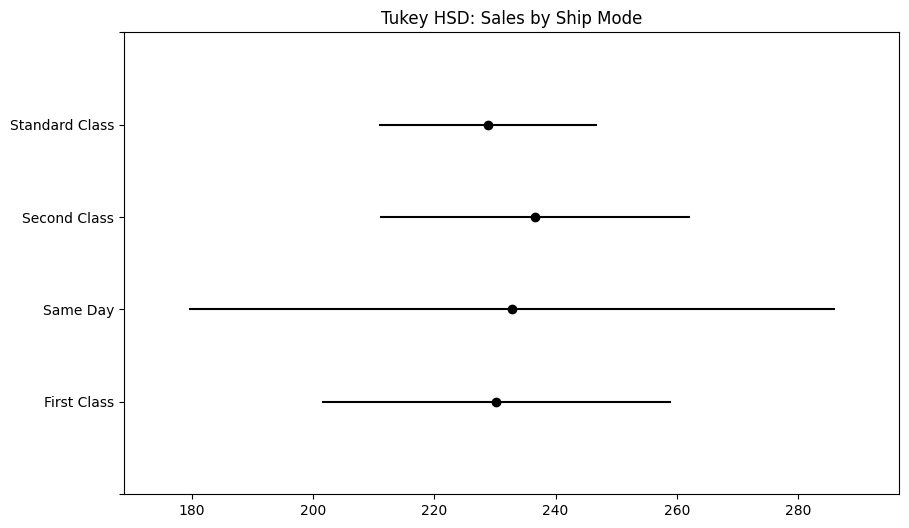

In [10]:
tukey = pairwise_tukeyhsd(endog=df['Sales'], groups=df['Ship Mode'], alpha=0.05)
print(tukey)

# Plot confidence intervals
fig = tukey.plot_simultaneous()
plt.title("Tukey HSD: Sales by Ship Mode")
plt.show()


### Tukey HSD Interpretation
- If a confidence interval does **not** include 0, then that pair of ship modes has significantly different sales.  
- This gives us actionable insights about **which shipping methods matter most** in terms of sales impact.


### Kruskal-Wallis Test (Non-parametric)
If ANOVA assumptions are violated, we confirm results with the Kruskal-Wallis test.


In [11]:
h_stat, p_val = stats.kruskal(*groups)
print(f"Kruskal-Wallis results: H={h_stat:.4f}, p={p_val:.6f}")


Kruskal-Wallis results: H=1.9490, p=0.583056


## Final Conclusion
Based on ANOVA and Tukey HSD:

- If **significant**: Sales differ across at least one shipping mode.  
  This suggests shipping method may influence customer purchase behavior or order values.  

- If **not significant**: Shipping modes do not have a meaningful impact on sales.  
  Business focus should shift to other factors (segment, region, category).  

This concludes our hypothesis testing.  

